In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from copy import deepcopy
%matplotlib inline

## SKLearn

(почти) каждый класс в SKLearn имеет следующие методы:

In [ ]:
class KNN():
    def __init__(self, n_neighbors=5, p=2, metric='minkowski'):
        <your code>
    
    def fit(self, X_train, y_train):
        <your code>
        
    def predict(self, X_test):
        <your code>
        
    def predict_proba(self, X_test):
        <your code>

(у регрессий нет predict_proba, есть только predict)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

my_knn = KNN(k=<choose your favourite>)
sklearn_knn = KNeighborsClassifier(k=<choose your favourite>)

## House pricing

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [2]:
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()
diabetes_X = diabetes.data
diabetes_Y = diabetes.target

In [7]:
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]


In [4]:
diabetes.DESCR.split('\n')

['Diabetes dataset',
 '================',
 '',
 'Notes',
 '-----',
 '',
 'Ten baseline variables, age, sex, body mass index, average blood',
 'pressure, and six blood serum measurements were obtained for each of n =',
 '442 diabetes patients, as well as the response of interest, a',
 'quantitative measure of disease progression one year after baseline.',
 '',
 'Data Set Characteristics:',
 '',
 '  :Number of Instances: 442',
 '',
 '  :Number of Attributes: First 10 columns are numeric predictive values',
 '',
 '  :Target: Column 11 is a quantitative measure of disease progression one year after baseline',
 '',
 '  :Attributes:',
 '    :Age:',
 '    :Sex:',
 '    :Body mass index:',
 '    :Average blood pressure:',
 '    :S1:',
 '    :S2:',
 '    :S3:',
 '    :S4:',
 '    :S5:',
 '    :S6:',
 '',
 'Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).',
 '',
 'Source URL:

In [10]:
X_df = pd.DataFrame(diabetes_X, columns=diabetes.feature_names)
X_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


Посмотрим на корреляции признаков между собой:

In [11]:
X_df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


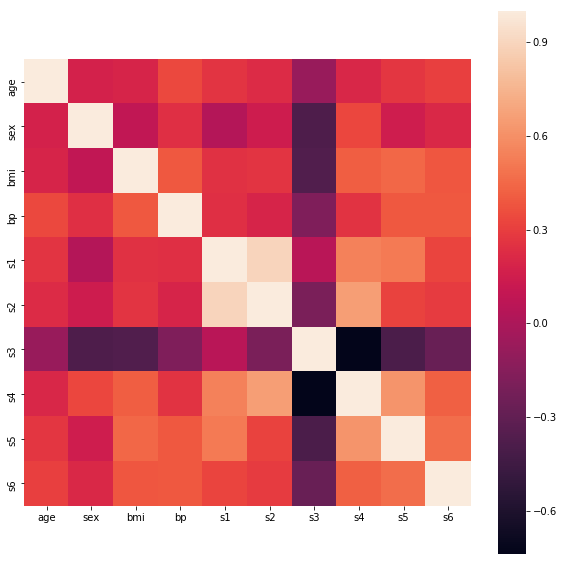

In [9]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(10,10))
sns.heatmap(X_df.corr(), square=True)
plt.show()

### Linear Regression

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import StandardScaler

In [13]:
lr = LinearRegression()
np.mean(cross_val_score(lr, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-2993.072943299887

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(diabetes_X, diabetes_Y, test_size=0.2)

In [16]:
lr = LinearRegression().fit(x_train, y_train)
lr.predict(x_test).ravel().astype(int)

array([ 63, 179, 188, 158, 146, 115, 135, 124, 120, 145,  82, 166, 101,
       159, 115, 113, 290,  82, 170, 128, 107, 128, 199, 155, 151, 267,
        94, 168, 117,  98, 132, 110, 139, 222, 123,  90, 158, 145, 165,
        79, 158, 230,  81, 226, 194, 236,  90, 105, 229, 152,  99,  60,
        89, 189, 133, 292, 205, 158, 133, 246, 150, 247, 121,  93, 263,
       198, 170, 219, 143, 121, 113, 150, 166,  64, 122, 113, 105, 124,
       115, 235, 226,  73, 153,  81, 125, 285,  68, 275, 232])

In [17]:
np.array(y_test).ravel()

array([ 43., 139., 198., 129., 219., 107.,  40., 135., 191.,  25., 104.,
       265.,  47., 216.,  61.,  63., 270.,  42., 206.,  83., 104.,  97.,
        68.,  91., 136., 220., 158., 245., 152.,  81.,  59.,  72., 219.,
       173.,  53.,  87.,  85., 200., 120., 200., 198., 261.,  55., 192.,
        78., 232.,  93., 102., 270., 134.,  72.,  52.,  42., 126., 131.,
       242., 150., 144.,  42., 264.,  61., 272.,  59.,  84., 233., 233.,
       190., 257.,  93., 127.,  88.,  95., 109., 143.,  89., 179.,  90.,
        53.,  79., 268., 248., 128., 246.,  92., 168., 281.,  72., 346.,
       128.])

Посмотрим, какие коэффициенты получились у линейной регрессии:

In [18]:
lr.fit(x_train, y_train)
print(X_df.columns)
print(lr.coef_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[  -7.70221814 -208.44700314  520.01717981  255.88391273 -778.08348518
  428.19359204  103.80280954  212.06930904  783.39175807   87.68722756]


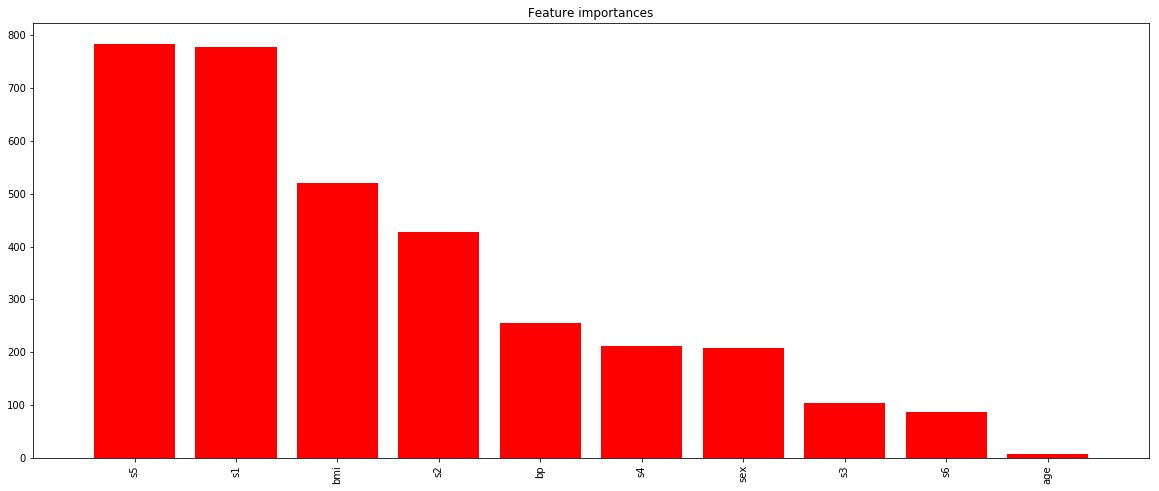

In [19]:
importances = np.abs(lr.coef_)
indices = np.argsort(importances)[::-1]
columns_num = len(X_df.columns)

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(columns_num), importances[indices],
       color="r",  align="center")
plt.xticks(range(columns_num), X_df.columns[indices])
plt.xlim([-1, columns_num])
plt.xticks(rotation=90)
plt.show()

# To-Do

In [21]:
#<Попробуйте применить Lasso и Ridge регрессии к нашему набору данных> 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [53]:
l = Lasso(alpha=0.5)
np.mean(cross_val_score(l, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-3273.2531924600635

In [23]:
r = Ridge()
np.mean(cross_val_score(r, diabetes_X, diabetes_Y, scoring='neg_mean_squared_error', cv=5))

-3420.3189747853853

In [55]:
l = Lasso(alpha=0.5).fit(x_train, y_train)
l.predict(x_test).ravel().astype(int)

array([ 92, 195, 167, 158, 164, 138, 115, 124, 141, 138, 104, 172, 115,
       141, 121, 140, 238,  89, 159, 135, 135, 141, 207, 152, 151, 227,
       110, 169, 118, 120, 139, 116, 137, 204, 132, 120, 175, 150, 162,
        95, 171, 199,  90, 215, 179, 204, 103, 120, 193, 165, 112,  96,
       111, 181, 138, 256, 187, 151, 142, 217, 148, 205, 138, 106, 250,
       210, 156, 186, 137, 121, 136, 164, 187,  83, 127, 123, 121, 135,
       114, 217, 220,  91, 150, 108, 135, 239,  91, 238, 208])

In [41]:
np.array(y_test).ravel()

array([ 43., 139., 198., 129., 219., 107.,  40., 135., 191.,  25., 104.,
       265.,  47., 216.,  61.,  63., 270.,  42., 206.,  83., 104.,  97.,
        68.,  91., 136., 220., 158., 245., 152.,  81.,  59.,  72., 219.,
       173.,  53.,  87.,  85., 200., 120., 200., 198., 261.,  55., 192.,
        78., 232.,  93., 102., 270., 134.,  72.,  52.,  42., 126., 131.,
       242., 150., 144.,  42., 264.,  61., 272.,  59.,  84., 233., 233.,
       190., 257.,  93., 127.,  88.,  95., 109., 143.,  89., 179.,  90.,
        53.,  79., 268., 248., 128., 246.,  92., 168., 281.,  72., 346.,
       128.])

In [56]:
l.fit(x_train, y_train)
print(X_df.columns)
print(l.coef_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[  0.          -0.         445.76294692  87.03098398  -0.
  -0.         -75.14458536   0.         468.20684925   0.        ]


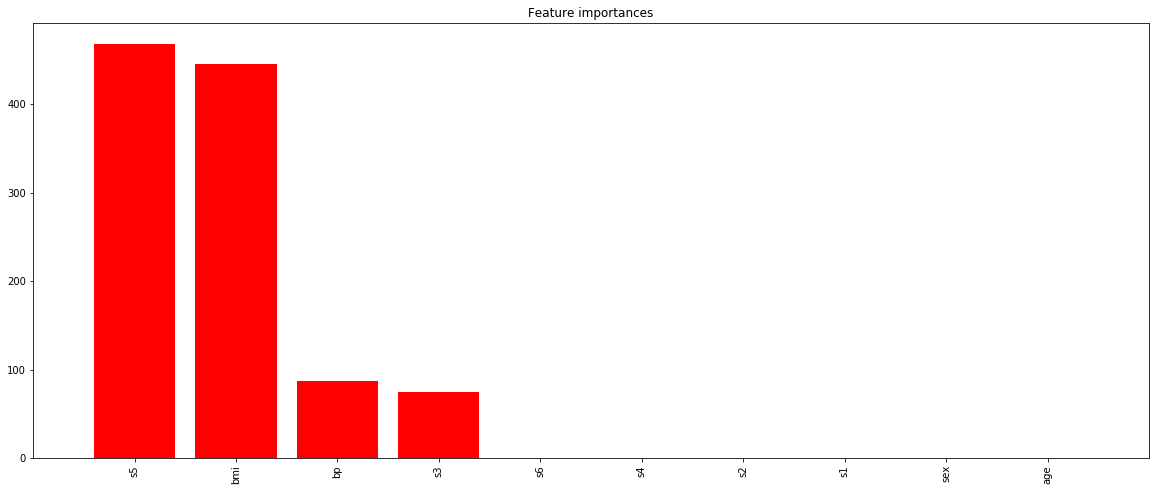

In [57]:
importances = np.abs(l.coef_)
indices = np.argsort(importances)[::-1]
columns_num = len(X_df.columns)

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(columns_num), importances[indices],
       color="r",  align="center")
plt.xticks(range(columns_num), X_df.columns[indices])
plt.xlim([-1, columns_num])
plt.xticks(rotation=90)
plt.show()

In [28]:
r = Ridge().fit(x_train, y_train)
r.predict(x_test).ravel().astype(int)

array([100, 190, 164, 147, 162, 143, 129, 135, 133, 138, 106, 162, 126,
       154, 113, 153, 230, 106, 158, 141, 143, 144, 182, 167, 137, 227,
       129, 164, 106, 120, 141, 124, 142, 201, 138, 105, 151, 147, 180,
       105, 168, 202,  96, 204, 166, 199, 110, 133, 202, 147, 125,  96,
       116, 170, 130, 256, 193, 161, 145, 220, 147, 200, 128, 106, 222,
       183, 176, 193, 140, 132, 128, 155, 172,  85, 156, 124, 111, 139,
       129, 220, 222, 103, 149, 111, 125, 216, 105, 209, 194])

In [29]:
np.array(y_test).ravel()

array([ 43., 139., 198., 129., 219., 107.,  40., 135., 191.,  25., 104.,
       265.,  47., 216.,  61.,  63., 270.,  42., 206.,  83., 104.,  97.,
        68.,  91., 136., 220., 158., 245., 152.,  81.,  59.,  72., 219.,
       173.,  53.,  87.,  85., 200., 120., 200., 198., 261.,  55., 192.,
        78., 232.,  93., 102., 270., 134.,  72.,  52.,  42., 126., 131.,
       242., 150., 144.,  42., 264.,  61., 272.,  59.,  84., 233., 233.,
       190., 257.,  93., 127.,  88.,  95., 109., 143.,  89., 179.,  90.,
        53.,  79., 268., 248., 128., 246.,  92., 168., 281.,  72., 346.,
       128.])

In [30]:
r.fit(x_train, y_train)
print(X_df.columns)
print(r.coef_)

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')
[  35.44621403  -59.95030796  266.46742257  169.10547747   15.67421969
  -21.4743925  -144.9632018   120.41164291  256.23629799  117.90713838]


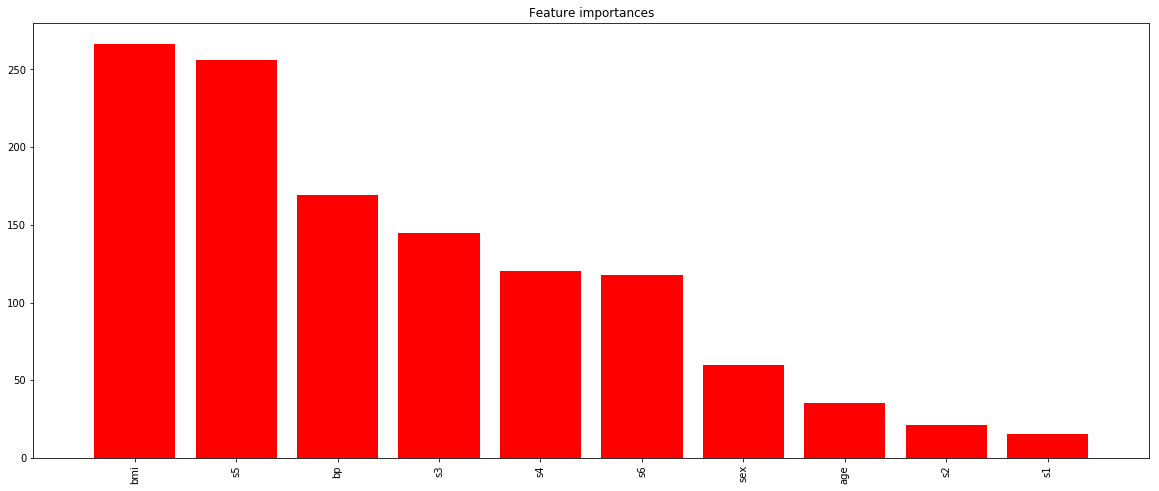

In [31]:
importances = np.abs(r.coef_)
indices = np.argsort(importances)[::-1]
columns_num = len(X_df.columns)

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(columns_num), importances[indices],
       color="r",  align="center")
plt.xticks(range(columns_num), X_df.columns[indices])
plt.xlim([-1, columns_num])
plt.xticks(rotation=90)
plt.show()

Посмотрим также на корреляцию признаков:

## Предсказание сердечно-сосудистых заболеваний

https://mlbootcamp.ru/round/12/sandbox/

In [58]:
train_data = pd.read_csv("train_med.csv", delimiter=';')
train_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [59]:
X_train, Y_train = np.array(train_data.drop("cardio", axis=1).drop("id", axis=1)), np.array(train_data['cardio'])

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators =10, max_depth = 10)
np.mean(cross_val_score(rf, X_train, Y_train, scoring='accuracy', cv=5))

0.7352285902691692

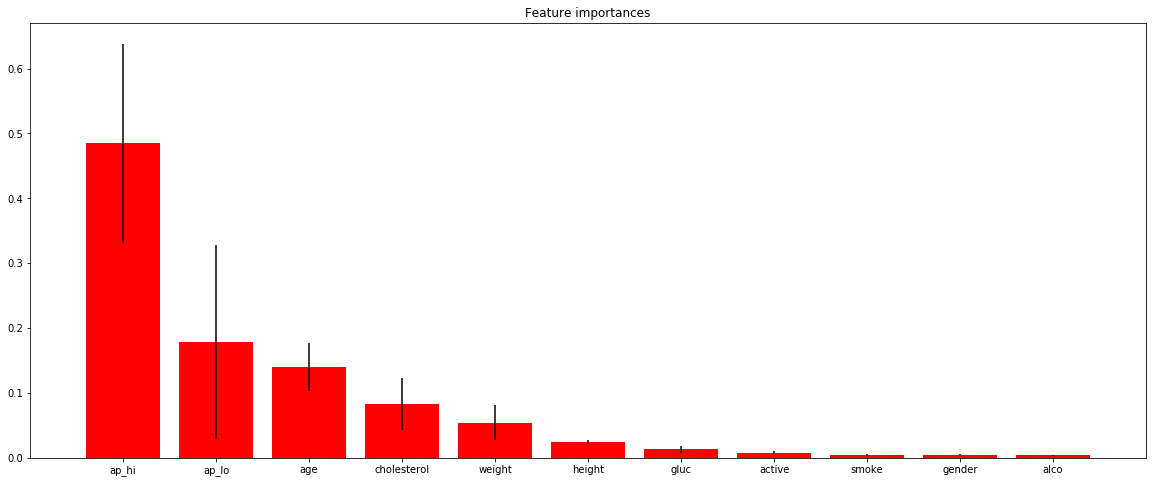

In [69]:
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), train_data.drop(["cardio", "id"], axis=1).columns[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [70]:
from sklearn.grid_search import GridSearchCV

rf = RandomForestClassifier(max_depth=3)
params = {
    'n_estimators':[10,20],
    'max_depth': [3, 10, 50, None],
    'min_samples_split': [2, 3, 4]
}
#verbose - информационные сообщения
gsv = GridSearchCV(estimator=rf, param_grid=params, scoring='accuracy', cv=3, verbose=1)
gsv.fit(X_train, Y_train)

C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\cuusr5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   18.0s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 10, 50, None], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=1)

In [71]:
print(gsv.best_params_, gsv.best_score_)

{'max_depth': 10, 'min_samples_split': 3} 0.7331571428571428


In [72]:
gsv.grid_scores_

[mean: 0.72403, std: 0.00210, params: {'max_depth': 3, 'min_samples_split': 2},
 mean: 0.71979, std: 0.00405, params: {'max_depth': 3, 'min_samples_split': 3},
 mean: 0.72394, std: 0.00269, params: {'max_depth': 3, 'min_samples_split': 4},
 mean: 0.73250, std: 0.00155, params: {'max_depth': 10, 'min_samples_split': 2},
 mean: 0.73316, std: 0.00123, params: {'max_depth': 10, 'min_samples_split': 3},
 mean: 0.73273, std: 0.00017, params: {'max_depth': 10, 'min_samples_split': 4},
 mean: 0.69867, std: 0.00157, params: {'max_depth': 50, 'min_samples_split': 2},
 mean: 0.70260, std: 0.00181, params: {'max_depth': 50, 'min_samples_split': 3},
 mean: 0.70803, std: 0.00099, params: {'max_depth': 50, 'min_samples_split': 4},
 mean: 0.70044, std: 0.00233, params: {'max_depth': None, 'min_samples_split': 2},
 mean: 0.70127, std: 0.00101, params: {'max_depth': None, 'min_samples_split': 3},
 mean: 0.70529, std: 0.00099, params: {'max_depth': None, 'min_samples_split': 4}]

#### XGBoost

In [ ]:
<do the same for GradientBoostingClassifier and other eatimators> 

### Model Ensembles

Мы можем предсказывать не класс, а вероятности классов:

In [73]:
train_data = pd.read_csv("train_med.csv", delimiter=';')

X_train, Y_train = np.array(train_data.drop("cardio", axis=1)), np.array(train_data['cardio'])

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.15, random_state=37)

In [75]:
rf = RandomForestClassifier(n_estimators=100).fit(X_train, Y_train)
pred = rf.predict_proba(X_test)

In [76]:
pred

array([[0.29, 0.71],
       [0.29, 0.71],
       [0.72, 0.28],
       ...,
       [0.12, 0.88],
       [0.29, 0.71],
       [0.17, 0.83]])

In [89]:
from sklearn.linear_model import LogisticRegression
estimator1 = LogisticRegression()
estimator2 = RandomForestClassifier()

estimator1.fit(X_train, Y_train)
estimator2.fit(X_train, Y_train)

pred1 = estimator1.predict_proba(X_test)[:, 1]
pred2 = estimator2.predict_proba(X_test)[:, 1]

itog = pd.DataFrame()
itog['Pred1']=pred1
itog['Pred2']=pred2

print(itog.mean())
#print(pred2)
#print(X_train)

Pred1    0.502119
Pred2    0.496648
dtype: float64
